In [ ]:
# Download dependencies
!pip3 install pandas
!pip3 install matplotlib
!pip3 install adjustText

# Generate graph from the actual results

<Figure size 640x480 with 0 Axes>

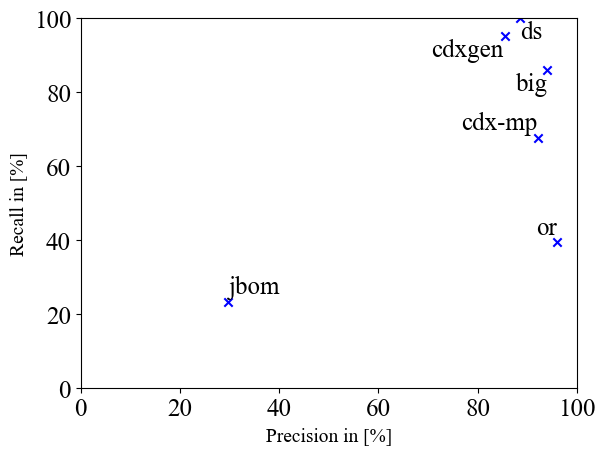

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib import rcParams

rcParams.update({'font.size': 18})
rcParams['font.family'] = 'Times New Roman'
texts = []
data = pd.read_csv("./resultsssTreeAverageWithoutFailures.csv")
text = ["cdxgen","ds","jbom","cdx-mp", "or","big"]
data.shape
data.head()
g1 = data
D_P = g1['P']
D_R = g1['R']
fig = plt.figure()
fig, ax1 = plt.subplots(1, sharex=True, sharey=True)
ax1.scatter(D_P,D_R, c='b', marker='x')
plt.xlabel('Precision in [%]', fontsize=14)
plt.ylabel('Recall in [%]', fontsize=14)
plt.ylim([0, 100])
plt.xlim([0, 100])
# Loop for annotation of all points
for i in range(len(D_P)):
    texts.append(plt.text(D_P[i], D_R[i], text[i]))




adjust_text(texts,# x=D_P+T_P, y=D_R+T_R, autoalign='x',
            #force_points=5,
            #force_text=True,
            )
plt.savefig("resultGraphic.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Generate Venn diagram from the actual results

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from itertools import product
rcParams.update({'font.size': 18})
rcParams['font.family'] = 'Times New Roman'

def annotate_regions(venn, titles=None, ax=None, **kwargs):
    ax = ax or plt.gca()
    titles = titles or list(map(''.join, product('01','01','01')))
    kwargs = kwargs or {'bbox': dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
                        'arrowprops': dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray')}

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    for i in range(1,3):
        region = format(i, '#05b')[3:]
        print(region)
        label = v.get_label_by_id(region)
        if not label: continue
        ax.annotate(titles[i], 
                    xy=label.get_position() + np.array([0, 0.05]),
                    xytext=(xmax+0.1, ymax-i*0.15),
                    ha='left', textcoords='data',
                    **kwargs)
path = "./venn"
dirs = os.listdir(path)
# Get all sbom producers for every folder
for project in dirs:
    path = "./venn/" + project
    producers = os.listdir(path)
    truthPath = "./venn/" + project + "/truth.json"
    truth = pd.read_json(truthPath)
    truthList = []
    for idx,dependency in truth.iterrows():
        id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
        truthList.append(id)
    map = {}
    for producer in producers:
        if(producer == "truth.json"):
            continue
        path = "./venn/" + project + "/" + producer
        data = pd.read_json("./venn/" + project + "/" + producer)
        # get json array named truePositives
        # create a ID with groupID+artifactID+version for every object in truePositives
        list = []
        for idx,dependency in data.iterrows():
            id = dependency['groupId'] + dependency['artifactId'] + dependency['version']
            list.append(id)
        # venn it
        v = venn2([set(truthList), set(list)], set_labels = ('', ""), alpha=0.4, set_colors=('r', 'b'))
        v.get_label_by_id('10').set_text(v.get_label_by_id('10').get_text() + "\n" + "false negatives")
        v.get_label_by_id('01').set_text(v.get_label_by_id('01').get_text()  + "\n" + "false positives")
        if(v.get_label_by_id('11') != None):
            v.get_label_by_id('11').set_text(v.get_label_by_id('11').get_text()  + "\n" + "correct")
        #annotate_regions(v, titles=['Truth', "correct",producer])
        ## create dir if not exists
        if not os.path.exists("./vennResults/" + project):
            os.makedirs("./vennResults/" + project)
            # get the position of the text from the venn diagram each region
        plt.title(project + " " + producer.replace(".json",""))
        plt.savefig("./vennResults/" + project + "/"+ producer+ ".pdf", format="pdf", bbox_inches="tight")
        plt.clf()
        # add the list to the map with the key of the producer name      
        # Get all sbom producers for every folder 

<Figure size 640x480 with 0 Axes>